In [1]:
#Dependencies
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot, pylab
import scipy.stats as stats
import math


In [25]:
#Read in the data
austin_data = pd.read_csv("../../raw data/Austin_merged_data_with_time_deltas.csv")
louisville_data = pd.read_csv("../../raw data/Louisville_with_time_deltas_dogs_cats_only.csv")

In [26]:
austin_data['City']='Austin'
louisville_data['City']='Louisville'

austin_data=austin_data.loc[:,['Days from Intake to Outcome','Animal Type_intake']]
louisville_data=louisville_data.loc[:,['Days between Intake and Outcome','AnimalType']]

austin_data=austin_data.rename(columns={"Animal Type_intake":"Animal Type"})
louisville_data=louisville_data.rename(columns={"AnimalType":"Animal Type","Days between Intake and Outcome":"Days from Intake to Outcome"})
austin_data['City']='Austin'
louisville_data['City']='Louisville'
df=pd.concat([austin_data,louisville_data]).reset_index()

#Get the outcome types to be named the same things across AUS and Louisville data

df=df.replace(to_replace='DOG',value='Dog')
df=df.replace(to_replace='CAT',value='Cat')


Dog    108384
Cat     94108
Name: Animal Type, dtype: int64

,index,Days from Intake to Outcome,Animal Type,City
0,0,126.398611,Dog,Austin
1,1,4.138889,Dog,Austin
2,2,0.867361,Cat,Austin
3,3,4.711111,Dog,Austin
4,4,115.961111,Dog,Austin


In [31]:
#include only data for Dogs and Cats
group_by_animal_type=df.groupby(df['Animal Type'])

#count up total dogs and cats
df['Animal Type'].value_counts()

Dog    108384
Cat     94108
Name: Animal Type, dtype: int64

In [33]:
#create lists for boxplot showing intake times for cats vs dogs

cats=[]
dogs=[]

for row in range(len(df)):
    if (df.loc[row,'Animal Type']=="Cat") & (df.loc[row,'Days from Intake to Outcome']>0):
        cats.append(df.loc[row,'Days from Intake to Outcome'])
    elif (df.loc[row,'Animal Type']=="Dog") & (df.loc[row,'Days from Intake to Outcome']>0):
        dogs.append(df.loc[row,'Days from Intake to Outcome'])
    else:
        continue

In [40]:
%%capture

#set up the figure
data=[cats,dogs]
labels=['Cats','Dogs']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Animal Type (Cats vs Dogs)')
pylab.xlabel("Animal Type")
pylab.ylabel("Days from Intake to Outcome")

Mean values:
Cats: 15.462
Dogs: 14.044

Standard Deviations:
Cats: 34.421
Dogs: 37.595

Medians:
Cats: 5.857
Dogs: 5.983


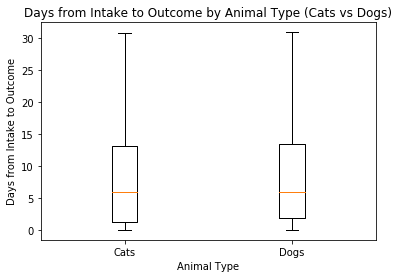

In [41]:
#save box and whiskers plot to PNG file
pyplot.savefig('../figures/time_to_outcome_by_animal_type.png')

print(f"Mean values:\nCats: {round(np.mean(cats),3)}\nDogs: {round(np.mean(dogs),3)}\n")
print(f"Standard Deviations:\nCats: {round(np.std(cats),3)}\nDogs: {round(np.std(dogs),3)}\n")
print(f"Medians:\nCats: {round(np.median(cats),3)}\nDogs: {round(np.median(dogs),3)}")

#show box and whiskers plot
pyplot.show()


In [37]:
#Is this difference significant? (Probably not, but let's check because we can)

#check for equality of variances (Levene's test)
stats.levene(cats,dogs)

#p = 0.41, do not reject the null hypothesis that variances are equal. (Assume equal variances)

# Run 2-Sample T-Test
result=stats.ttest_ind(cats, dogs, equal_var=False)

LeveneResult(statistic=114.94255314142457, pvalue=8.2401751710034954e-27)

In [38]:
print(f"t = {round(result.statistic,3)}\nP = {round(result.pvalue,3)}\nThe difference is not significant.")

t = 8.742
P = 0.0
The difference is not significant.
